<a href="https://colab.research.google.com/github/abhi311295/Bitcoin-Price-Analysis/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies 

In [132]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


Loading the Dataset

In [133]:
df = pd.read_csv('bit_1.csv')

Viewing the first 5 rows of the dataset 

In [134]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Info for the dataset

In [135]:
df.shape

(4857377, 8)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [137]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

Statistical anylysis of the dataset

In [138]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


Checking if there is any null vales 

In [139]:
x = df.isna().sum()  
x

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

Checking how many % of the null values are there in the Dataset

In [140]:
(x['Open']/len(df.index))*100

25.602459928475803

Droping the null vaues 

In [141]:
df.dropna(inplace=True)

Checking the duplicate values in the timestamp column

In [142]:
dup_1 = df[df.duplicated()]
dup_1

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price


Checking for the duplicated in the timestamp field

In [143]:
dup_2 = df[df.duplicated('Timestamp')]
dup_2

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price


**Data Processing**

Converting Timestamp in Date and Time format

In [144]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'] , unit='s')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


Checking the time range of the dataset

In [145]:
df['Timestamp'].min()

Timestamp('2011-12-31 07:52:00')

In [146]:
df['Timestamp'].max()

Timestamp('2021-03-31 00:00:00')

So we have the time range bwtween 12/2011 and 06/2016

Creating two new columns 

1.   Close - open (it is difference between close and open if we have vaalue grater then 0 then there is rise in the vlue )
2.   close - open percantage (its percenrage of the differenece measured in the close -open column )



In [147]:
df['Close - open'] = df['Close'] - df['Open']
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Close - open
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,0.00
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,0.00
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,0.07
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,0.00
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,0.00


In [148]:
df['(close - open) percentage'] = (df['Close - open'] / df['Open'])*100
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Close - open,(close - open) percentage
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,0.00,0.000000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,0.00,0.000000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,0.07,1.555556
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,0.00,0.000000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,0.00,0.000000


In [149]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


Open                          6009.023680
High                          6013.357082
Low                           6004.488004
Close                         6009.013545
Volume_(BTC)                     9.323249
Volume_(Currency)            41762.842397
Weighted_Price                6008.934800
Close - open                    -0.010135
(close - open) percentage       -0.000793
dtype: float64

In [150]:
df_g = df.groupby(pd.Grouper(key="Timestamp" , freq='y')).mean()
df_g

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Close - open,(close - open) percentage
Timestamp,,,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603,0.017500,0.388889
2012-12-31,10.094570,10.097488,10.091053,10.093934,21.328197,216.485795,10.094143,-0.000636,-0.005562
2013-12-31,254.281420,254.658978,253.855315,254.264327,15.734087,4851.052777,254.242741,-0.017093,-0.006630
2014-12-31,527.132511,527.571308,526.679647,527.137609,12.617999,6568.182937,527.113071,0.005097,0.000925
2015-12-31,274.366745,274.509271,274.208588,274.364343,14.823699,4146.228635,274.353829,-0.002401,-0.000810
2016-12-31,558.906222,559.088461,558.701291,558.905550,5.658247,3159.519900,558.890451,-0.000672,0.000060
2017-12-31,4155.221695,4159.353798,4150.157998,4155.146585,9.721584,45053.550037,4154.759504,-0.075110,-0.000350
2018-12-31,7576.803839,7582.514112,7570.686577,7576.778120,7.774885,60791.446371,7576.505596,-0.025719,0.000025
2019-12-31,7427.136604,7431.551337,7422.596721,7426.850617,5.890939,45557.178460,7427.214436,-0.285986,-0.002670


**setting Timestamp as index**

In [151]:
df.set_index('Timestamp', inplace=True)

groping up the dataset by the year

**Analysis**

variation observed in Open close price of BTC

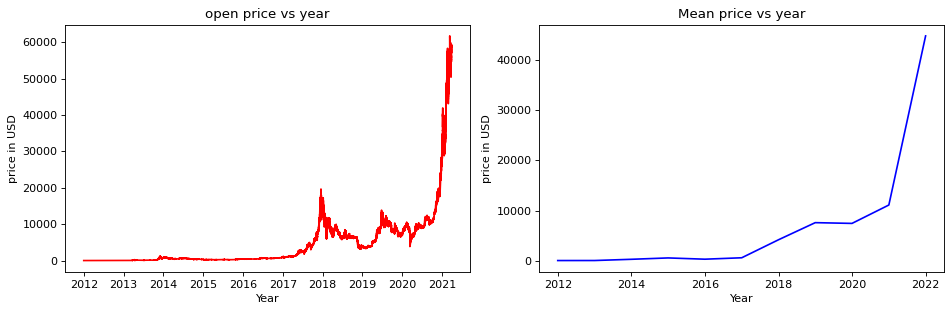

In [152]:
figure(figsize = (12,4), dpi = 80)
plt.subplot(1,2,1)
plt.plot(df['Open'], color = 'r')
plt.xlabel('Year')
plt.ylabel('price in USD')
plt.title('open price vs year')
plt.tight_layout()


plt.subplot(1,2,2)
plt.plot(df_g['Open'], color = 'b')
plt.xlabel('Year')
plt.ylabel('price in USD')
plt.title('Mean price vs year')
plt.tight_layout()


**Insights from the above anylysis and also from the market reshearch**



1.   we can see from the above graph that bitcoin price increased over the year.
2.   we can see the maximum rise in the price seen late in DEC 2020 and in early 2021.
3.   mean price was stable till 2017 and after that it has increased and readched its maximum in 2021.



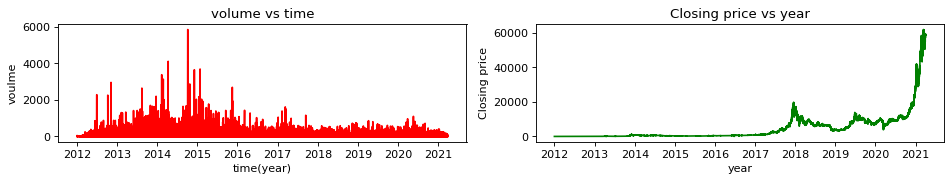

In [167]:
figure(figsize= (12,4) , dpi= 80)
plt.subplot(2,2,1)
plt.plot(df['Volume_(BTC)'] , color = 'r')
plt.xlabel('time(year)')
plt.ylabel('voulme')
plt.title('volume vs time')
plt.tight_layout()

plt.subplot(2,2,2)
plt.plot(df['Close'], color = 'g')
plt.xlabel('year')
plt.ylabel('Closing price')
plt.title('Closing price vs year')
plt.tight_layout()
